In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Data/House data.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
numeric_list = ['int16','int32','int64','float16','float32','float64']
numeric_cols = list(data.select_dtypes(include=numeric_list).columns)

In [10]:
data = data[numeric_cols]

In [11]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [13]:
data.drop('Id', axis=1, inplace=True)

In [15]:
x = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [17]:
x_train.shape

(1022, 36)

In [18]:
x_train.isna().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [19]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(x_train.fillna(0),y_train)
mutual_info

array([2.60131307e-01, 2.07787755e-01, 1.66586800e-01, 5.35231017e-01,
       1.05213371e-01, 3.44837531e-01, 2.37945220e-01, 9.53928950e-02,
       1.63927604e-01, 0.00000000e+00, 1.12918937e-01, 3.82040818e-01,
       3.11931643e-01, 2.24205941e-01, 1.69877969e-03, 4.82059421e-01,
       1.94744565e-02, 0.00000000e+00, 2.72489568e-01, 8.78753137e-02,
       3.47427122e-02, 1.65739434e-02, 1.98830784e-01, 1.77376635e-01,
       2.69053165e-01, 3.70597678e-01, 3.67292437e-01, 7.00066401e-02,
       1.68865321e-01, 2.32159266e-02, 8.15185011e-03, 1.94911629e-02,
       7.73590581e-03, 1.52392527e-03, 0.00000000e+00, 3.93835519e-04])

In [20]:
m_info = pd.Series(mutual_info, index=x_train.columns)
m_info.sort_values(ascending=False)

OverallQual      0.535231
GrLivArea        0.482059
TotalBsmtSF      0.382041
GarageCars       0.370598
GarageArea       0.367292
YearBuilt        0.344838
1stFlrSF         0.311932
FullBath         0.272490
GarageYrBlt      0.269053
MSSubClass       0.260131
YearRemodAdd     0.237945
2ndFlrSF         0.224206
LotFrontage      0.207788
TotRmsAbvGrd     0.198831
Fireplaces       0.177377
OpenPorchSF      0.168865
LotArea          0.166587
BsmtFinSF1       0.163928
BsmtUnfSF        0.112919
OverallCond      0.105213
MasVnrArea       0.095393
HalfBath         0.087875
WoodDeckSF       0.070007
BedroomAbvGr     0.034743
EnclosedPorch    0.023216
ScreenPorch      0.019491
BsmtFullBath     0.019474
KitchenAbvGr     0.016574
3SsnPorch        0.008152
PoolArea         0.007736
LowQualFinSF     0.001699
MiscVal          0.001524
YrSold           0.000394
BsmtFinSF2       0.000000
BsmtHalfBath     0.000000
MoSold           0.000000
dtype: float64

<AxesSubplot: >

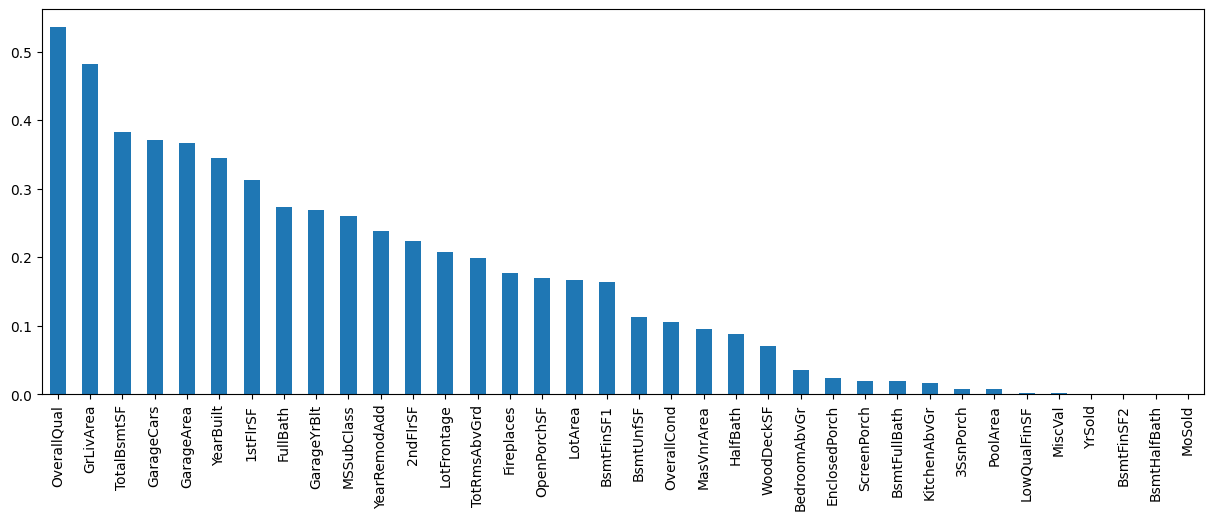

In [21]:
m_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [23]:
from sklearn.feature_selection import SelectPercentile

imp_cols = SelectPercentile(mutual_info_regression, percentile=20)
imp_cols.fit(x_train.fillna(0), y_train)
x_train.columns[imp_cols.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')